![alt text](path_to_banner_image.jpg)
# Predicting Student Success with Machine Learning
Author: Elijah Lopez



Realinho, V., Vieira Martins, M., Machado, J., & Baptista, L. (2021). Predict Students' Dropout and Academic Success [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.
from https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

## Overview


## Business Problem


## Data


### Summary of Data Findings


## Potential Routes of Analysis


## Chosen Metrics for Analysis


## Data Cleaning & Feature Engineering

## Analysis

### Direction 1


#### Direction 1 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 1:

### Direction 2


#### Direction 2 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 2:

### Direction 3

#### Direction 3 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 3:

## Results


### Direction 1
* 


### Direction 2
* 


### Direction 3
* 

## Conclusions
This analysis leads to three recommendations.

1. 

2. 

3. 

## Next Steps
* 

In [59]:
# Standard Data Science/Analysis Toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns

# Inferential Statistical Tests
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_rel


# Machine Learning Tools, Utilities, and Scoring Metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, RepeatedKFold, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, mean_squared_error, r2_score, explained_variance_score


# Suite of Machine Learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from xgboost import XGBRegressor


# Setup to Ignore Version Errors and Deprecations
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Display all columsn to get a feel for data structure and feature data
pd.set_option('display.max_columns', None)

df = pd.read_csv('data\predicting_students_dropout_and_academic_success.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Rename columns for conciseness and better readability
df = df.rename(columns={
    "Marital status": "marital_status",
    "Application mode": "application_mode", 
    "Application order": "application_order",
    "Course": "course",
    "Daytime/evening attendance\t": "class_time",
    "Previous qualification": "prev_qual",
    "Previous qualification (grade)": "prev_grade",
    "Nacionality": "nationality",
    "Mother's qualification": "mother_qual",
    "Father's qualification": "father_qual",
    "Mother's occupation": "mother_occ",
    "Father's occupation": "father_occ",
    "Admission grade": "admission_grade",
    "Displaced": "displaced",
    "Educational special needs": "special_needs",
    "Debtor": "debtor",
    "Tuition fees up to date": "tuition_current",
    "Gender": "gender",
    "Scholarship holder": "scholarship",
    "Age at enrollment": "age_enrolled",
    "International": "international",
    "Curricular units 1st sem (credited)": "units_cred_1s",
    "Curricular units 1st sem (enrolled)": "units_enr_1s",
    "Curricular units 1st sem (evaluations)": "units_eval_1s",
    "Curricular units 1st sem (approved)": "units_app_1s",
    "Curricular units 1st sem (grade)": "units_grade_1s",
    "Curricular units 1st sem (without evaluations)": "units_no_eval_1s",
    "Curricular units 2nd sem (credited)": "units_cred_2s",
    "Curricular units 2nd sem (enrolled)": "units_enr_2s",
    "Curricular units 2nd sem (evaluations)": "units_eval_2s",
    "Curricular units 2nd sem (approved)": "units_app_2s",
    "Curricular units 2nd sem (grade)": "units_grade_2s",
    "Curricular units 2nd sem (without evaluations)": "units_no_eval_2s",
    "Unemployment rate": "unemployment_rate",
    "Inflation rate": "inflation_rate",
    "GDP": "gdp",
    "Target": "target"
})

df.head()

,marital_status,application_mode,application_order,course,class_time,prev_qual,prev_grade,nationality,mother_qual,father_qual,mother_occ,father_occ,admission_grade,displaced,special_needs,debtor,tuition_current,gender,scholarship,age_enrolled,international,units_cred_1s,units_enr_1s,units_eval_1s,units_app_1s,units_grade_1s,units_no_eval_1s,units_cred_2s,units_enr_2s,units_eval_2s,units_app_2s,units_grade_2s,units_no_eval_2s,unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Take a look at data types of each column and observe dimensionality of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marital_status     4424 non-null   int64  
 1   application_mode   4424 non-null   int64  
 2   application_order  4424 non-null   int64  
 3   course             4424 non-null   int64  
 4   class_time         4424 non-null   int64  
 5   prev_qual          4424 non-null   int64  
 6   prev_grade         4424 non-null   float64
 7   nationality        4424 non-null   int64  
 8   mother_qual        4424 non-null   int64  
 9   father_qual        4424 non-null   int64  
 10  mother_occ         4424 non-null   int64  
 11  father_occ         4424 non-null   int64  
 12  admission_grade    4424 non-null   float64
 13  displaced          4424 non-null   int64  
 14  special_needs      4424 non-null   int64  
 15  debtor             4424 non-null   int64  
 16  tuition_current    4424 

In [5]:
# Check for null values
df.isna().sum().sum()

0

* We have 4,424 entries (students) measured on 36 feature columns and 1 target column
* Many columns are listed as integers but are in fact encoded categorical labels
* These should be grouped and handled by:
    * Binary - Leave as is
    * Cardinal - Utilize target encoding
    * Ordinal - Rank and order label schema and recode as necessary
    * Unrelated categorical - Utilize one hot encoding
    * Numerical - Leave as is

In [6]:
# Separate categorical features
cat_cols = [
 'marital_status',
 'application_mode',
 'application_order',
 'course',
 'class_time',
 'prev_qual',
 
 'nationality',
 'mother_qual',
 'father_qual',
 'mother_occ',
 'father_occ',
 
 'displaced',
 'special_needs',
 'debtor',
 'tuition_current',
 'gender',
 'scholarship',
 
 'international',
 
 'target']

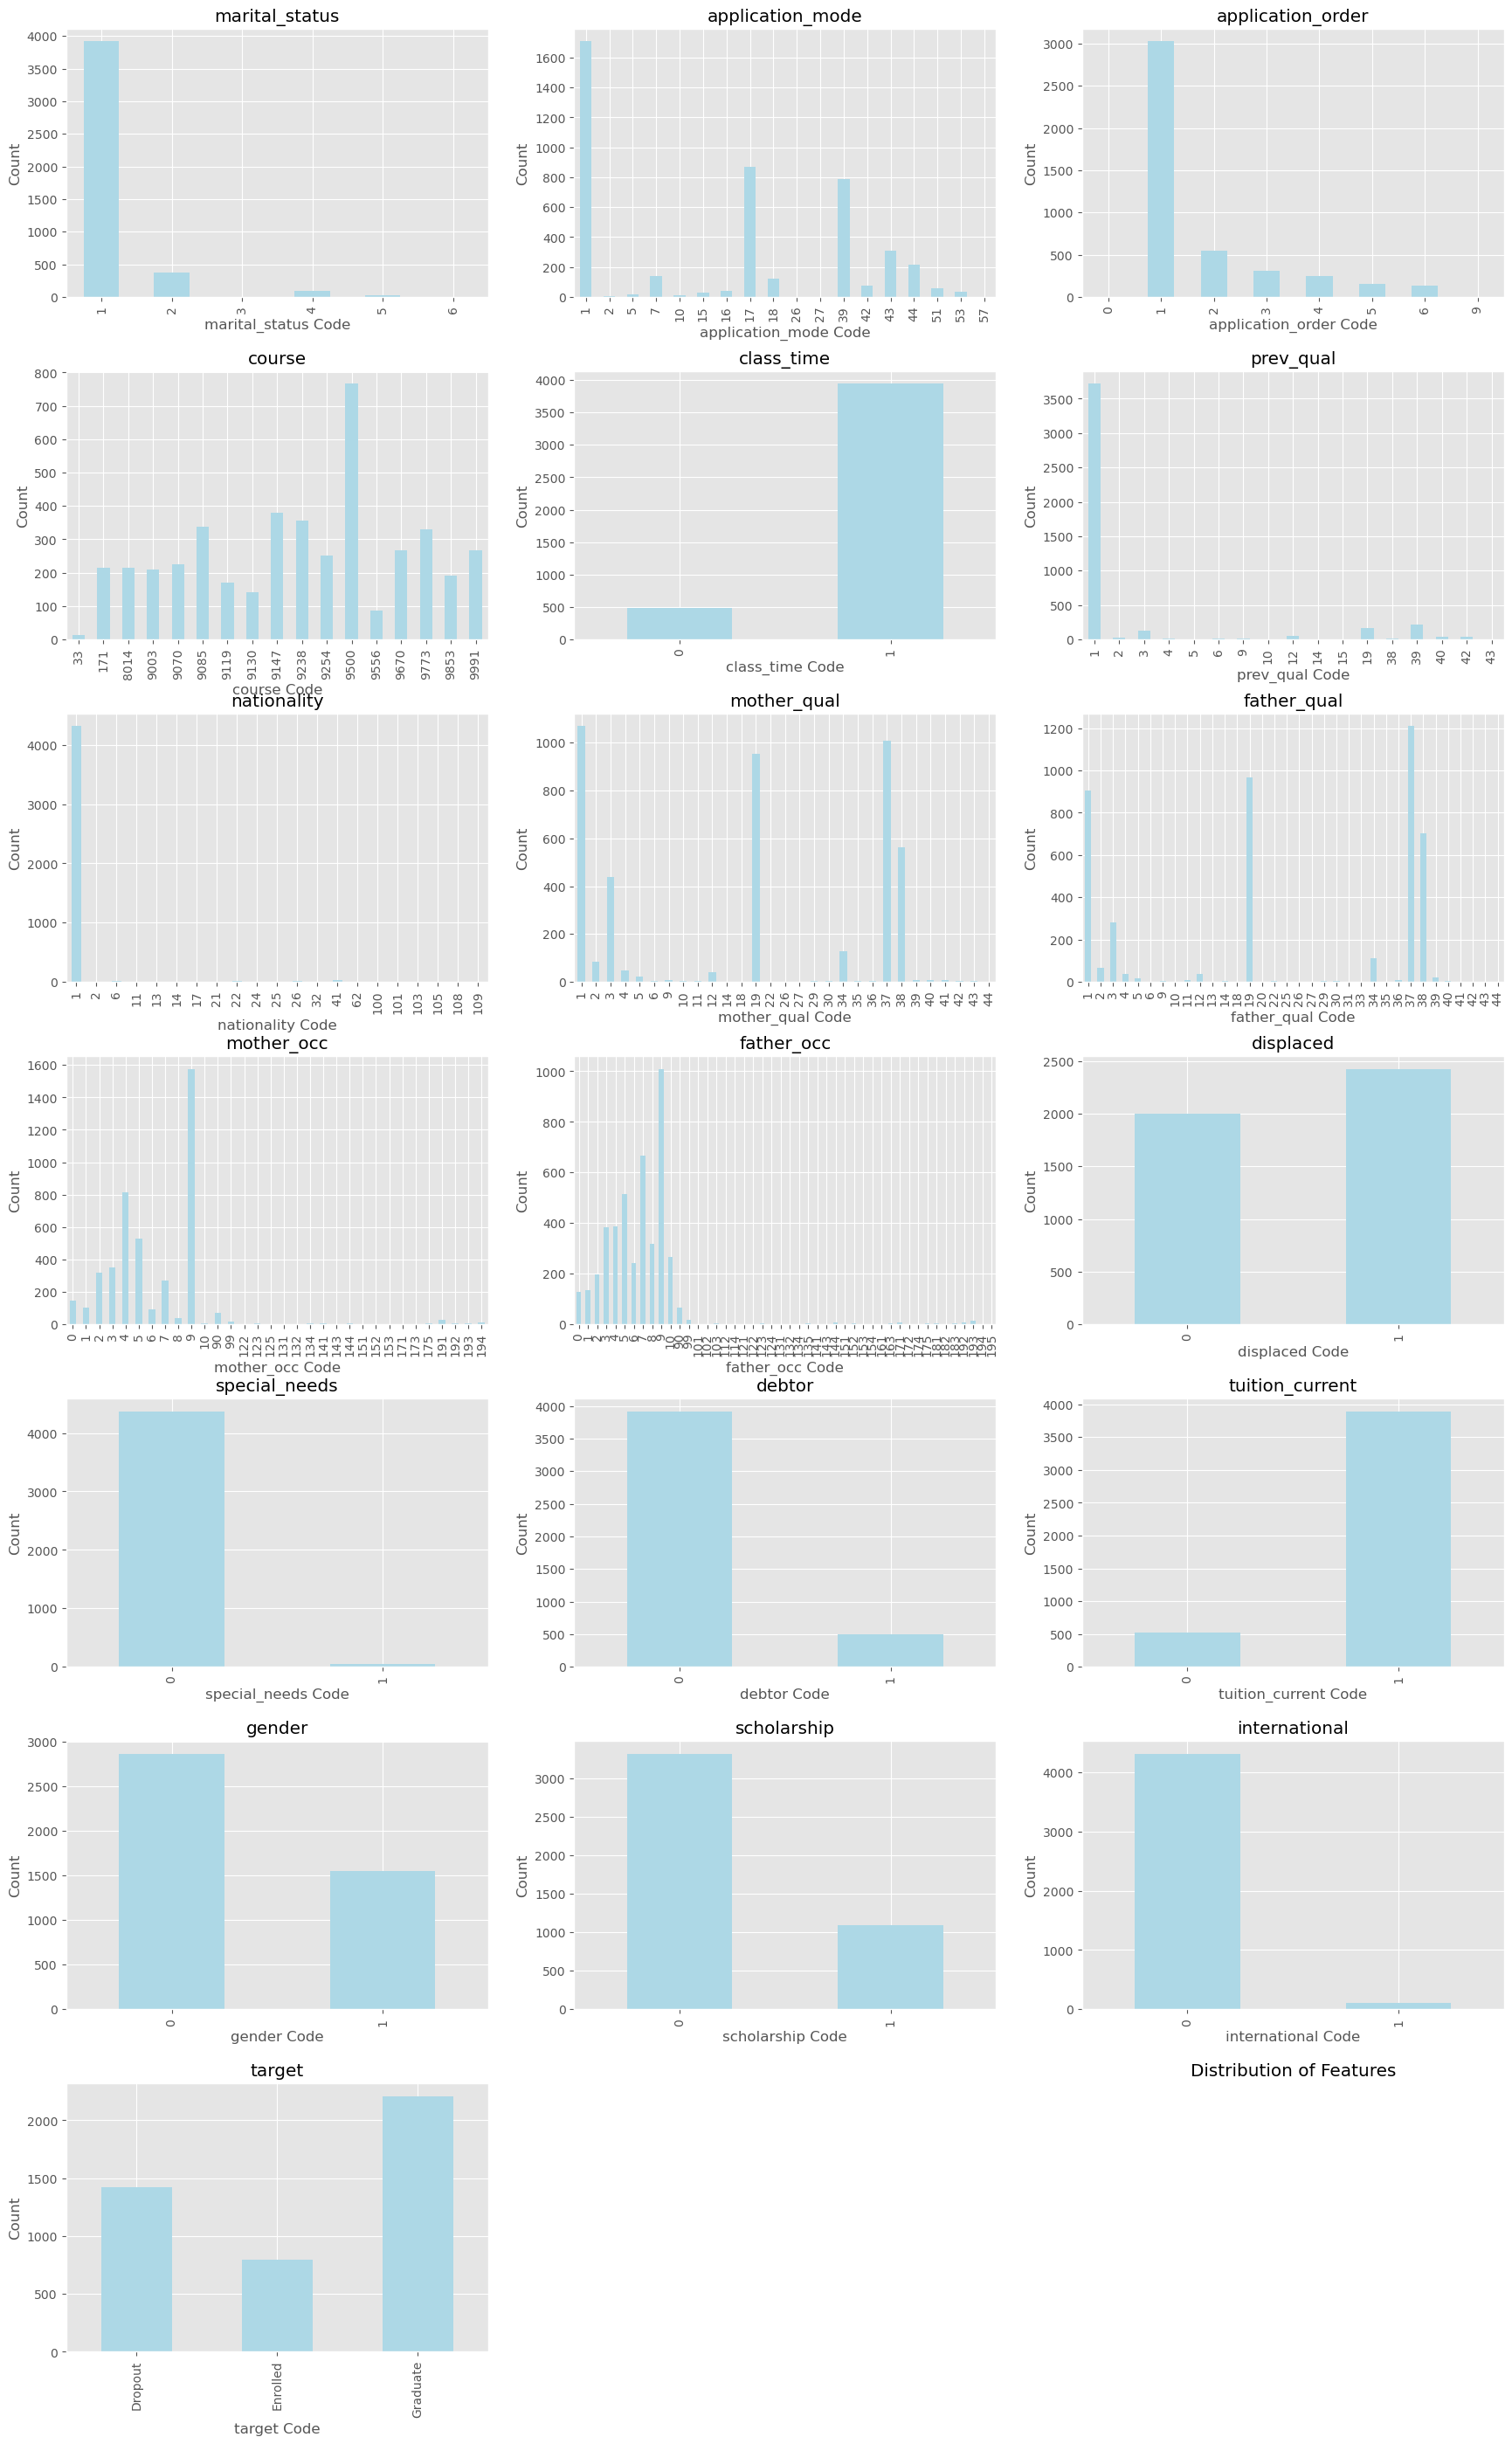

In [7]:
# Check the distribution of each

# Define the number of columns per row
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure with the calculated number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
fig.tight_layout(pad=4.0)

# Flatten axes array for easy iteration if more than one row is present
axes = axes.flatten()

for i, column in enumerate(cat_cols):
    df[column].value_counts().sort_index().plot(kind='bar', color='lightblue', ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(f'{column} Code')
    axes[i].set_ylabel('Count')

# Turn off unused axes if the number of plots is less than n_rows * n_cols
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

plt.title('Distribution of Features')
plt.show()

* Binary - Leave as is
    * Daytime/evening attendance
    * Displaced - Nearly even distribution
    * Educational special needs - Almost completely one-sided toward not having special needs
    * Debtor - Highly skewed toward no debtor
    * Tuition fees up to date - Highly skewed toward up to date payments
    * Gender - About twice as many female students recorded
    * Scholarship holder - Highly skewed toward no awarded scholarships
    * International - Almost completely one-sided toward domestic students
* Cardinal - Utilize target encoding to explore but keep dimensionality low
    * Course
    * Nacionality
    * Marital status
* Ordinal - Rank and order label schema and recode as necessary
    * Application order - Keep as is
    * Mother's qualification - Remap to more logical order
    * Father's qualification - Remap to more logical order
* Unrelated categorical - Utilize one hot encoding
    * Application mode
    * Previous qualification
    * Mother's occupation
    * Father's occupation
* Target - Will need to encode:
    * 0 = Dropout
    * 1 = Enrolled
    * 2 = Graduated

Questions:
1. Does time of classes affect Student Success?
2. Does displacement affect Student Success?
3. Do students that earn scholarships have higher likelihood of graduating?

In [8]:
cat_df = df[cat_cols]
cat_df.head()

,marital_status,application_mode,application_order,course,class_time,prev_qual,nationality,mother_qual,father_qual,mother_occ,father_occ,displaced,special_needs,debtor,tuition_current,gender,scholarship,international,target
0,1,17,5,171,1,1,1,19,12,5,9,1,0,0,1,1,0,0,Dropout
1,1,15,1,9254,1,1,1,1,3,3,3,1,0,0,0,1,0,0,Graduate
2,1,1,5,9070,1,1,1,37,37,9,9,1,0,0,0,1,0,0,Dropout
3,1,17,2,9773,1,1,1,38,37,5,3,1,0,0,1,0,0,0,Graduate
4,2,39,1,8014,0,1,1,37,38,9,9,0,0,0,1,0,0,0,Graduate


Does time of classes affect Student Success?
- 0 = Evening classes
- 1 = Daytime classes

In [9]:
# Group by class_time and count target
time_target_df = cat_df.groupby(by=['class_time', 'target']).size().unstack(fill_value=0)
time_target_df.reset_index(inplace=True)
time_target_df.columns.name = None
time_target_df


,class_time,Dropout,Enrolled,Graduate
0,0,207,75,201
1,1,1214,719,2008


In [10]:
# Convert counts to percentages for evening (0) and morning classes (1)
perc_time_target_df = time_target_df.copy()
perc_time_target_df['Total'] = perc_time_target_df[['Dropout', 'Enrolled', 'Graduate']].sum(axis=1)
for category in ['Dropout', 'Enrolled', 'Graduate']:
    perc_time_target_df[category] = (perc_time_target_df[category] / perc_time_target_df['Total']) * 100

perc_time_target_df.drop(columns=['Total'], inplace=True)
perc_time_target_df

,class_time,Dropout,Enrolled,Graduate
0,0,42.857143,15.52795,41.614907
1,1,30.804364,18.24410,50.951535


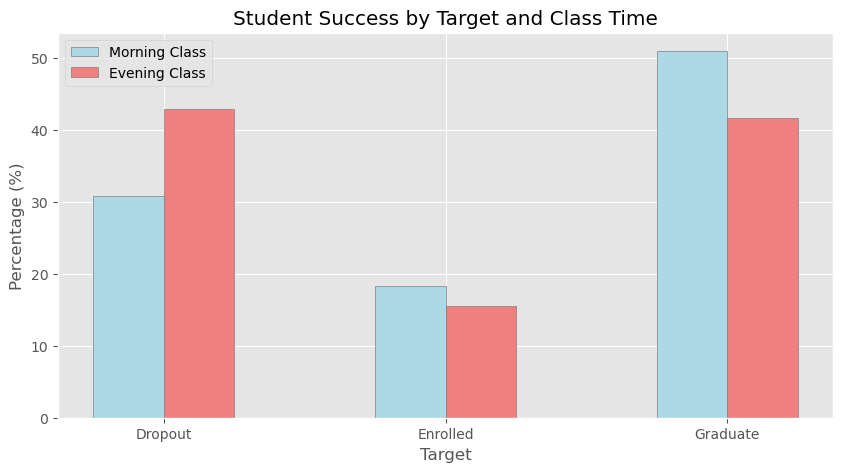

In [11]:
# Bar graph of Student Success by Target and Class Time

fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.25

# Define the positions for each group of bars (grouped by Target)
x = ['Dropout', 'Enrolled', 'Graduate']
r1 = np.arange(len(x))  # 'morning' on left
r2 = [x + bar_width for x in r1]  # 'evening' on right

# Plot the bars
ax.bar(r1, perc_time_target_df.iloc[1, 1:], color='lightblue', width=bar_width, edgecolor='grey', label='Morning Class')  # 'morning' == blue
ax.bar(r2, perc_time_target_df.iloc[0, 1:], color='lightcoral', width=bar_width, edgecolor='grey', label='Evening Class')  # 'evening' == red

# Set titles and labels
ax.set_title('Student Success by Target and Class Time')
ax.set_xlabel('Target')
ax.set_ylabel('Percentage (%)')
ax.set_xticks([r + bar_width / 2 for r in range(len(x))])  # Position x-ticks at the center of the grouped bars
ax.set_xticklabels(x)  # Use Target as labels for x-axis

# Add legend
ax.legend()

# Display the plot
plt.show();


I will use a Chi-Square Test to determine if these categorical values differ from expectations or not.

* H0: There is no significant difference in student success (Dropout, Enrolled, Graduate) based on class time (morning vs. evening).
* H1: There is a significant difference in student success (Dropout, Enrolled, Graduate) based on class time (morning vs. evening).

In [12]:
# Function to conduct Chi-Square test over data frame with given alpha
def chi_square_test(data_frame, alpha):
    alpha = alpha

    # Chi-Square Test
    chi2, p_value, dof, expected = chi2_contingency(data_frame[['Dropout', 'Enrolled', 'Graduate']])

    # Print the results
    print(f'Expected Frequencies Table: \n{expected}')
    print(f'\nChi-Square Value: {chi2}')
    print(f'p-value: {p_value}')
    if p_value < alpha:
        print(f'Reject the null hypothesis in favor of the alternative.')
    else: 
        print(f'Fail to reject the null hypothesis.')

In [13]:
# Run Test. Result is significant!
chi_square_test(time_target_df, 0.05)

Expected Frequencies Table: 
[[ 155.14082278   86.68670886  241.17246835]
 [1265.85917722  707.31329114 1967.82753165]]

Chi-Square Value: 28.73993733436746
p-value: 5.743834299642735e-07
Reject the null hypothesis in favor of the alternative.


Does displacement affect Student Success?

In [14]:
# Group by displaced and count target
displaced_target_df = cat_df.groupby(by=['displaced', 'target']).size().unstack(fill_value=0)
displaced_target_df.reset_index(inplace=True)
displaced_target_df.columns.name = None
displaced_target_df

,displaced,Dropout,Enrolled,Graduate
0,0,752,361,885
1,1,669,433,1324


In [15]:
# Convert counts to percentages for evening (0) and morning classes (1)
perc_displaced_target_df = displaced_target_df.copy()
perc_displaced_target_df['Total'] = perc_displaced_target_df[['Dropout', 'Enrolled', 'Graduate']].sum(axis=1)
for category in ['Dropout', 'Enrolled', 'Graduate']:
    perc_displaced_target_df[category] = (perc_displaced_target_df[category] / perc_displaced_target_df['Total']) * 100

perc_displaced_target_df.drop(columns=['Total'], inplace=True)
perc_displaced_target_df

,displaced,Dropout,Enrolled,Graduate
0,0,37.637638,18.068068,44.294294
1,1,27.576257,17.848310,54.575433


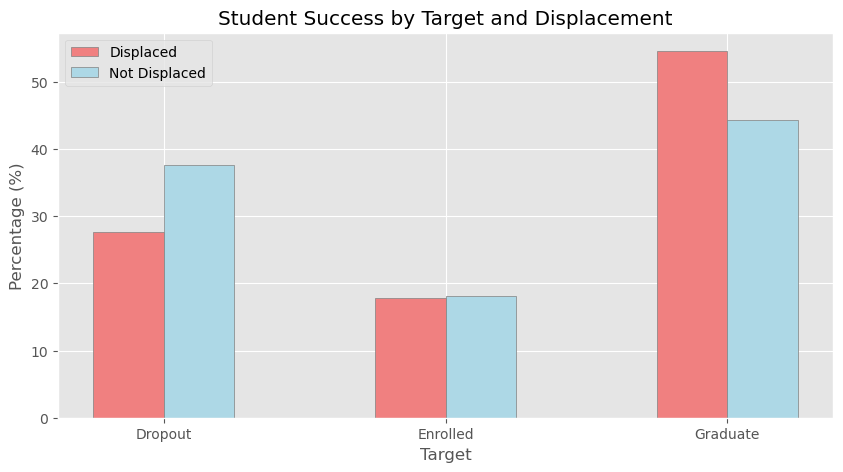

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.25

# Define the positions for each group of bars (grouped by Target)
x = ['Dropout', 'Enrolled', 'Graduate']
r1 = np.arange(len(x))  # 'Displaced' on left
r2 = r1 + bar_width  # 'Not Displaced' on right

# Plot the bars
ax.bar(r1, perc_displaced_target_df.iloc[1, 1:], color='lightcoral', width=bar_width, edgecolor='grey', label='Displaced')  # 'Displaced' == red
ax.bar(r2, perc_displaced_target_df.iloc[0, 1:], color='lightblue', width=bar_width, edgecolor='grey', label='Not Displaced')  # 'Not Displaced' == blue

# Set titles and labels
ax.set_title('Student Success by Target and Displacement')
ax.set_xlabel('Target')
ax.set_ylabel('Percentage (%)')
ax.set_xticks(r1 + bar_width / 2)  # Position x-ticks at the center of the grouped bars
ax.set_xticklabels(x)  # Use Target as labels for x-axis

# Add legend
ax.legend()

# Display the plot
plt.show();

I will use a Chi-Square Test to determine if these categorical values differ from expectations or not.

* H0: There is no significant difference in student success (Dropout, Enrolled, Graduate) based on displacement.
* H1: There is a significant difference in student success (Dropout, Enrolled, Graduate) based on displacement.

In [17]:
# Run the test. Not a significant result!
chi_square_test(displaced_target_df, 0.05)

Expected Frequencies Table: 
[[ 641.76265823  358.59222423  997.64511754]
 [ 779.23734177  435.40777577 1211.35488246]]

Chi-Square Value: 57.754195314669914
p-value: 2.8763109461402946e-13
Reject the null hypothesis in favor of the alternative.


Do students that earn scholarships have higher likelihood of graduating?

In [18]:
# Group by scholarship and count target
scholarship_target_df = cat_df.groupby(by=['scholarship', 'target']).size().unstack(fill_value=0)
scholarship_target_df.reset_index(inplace=True)
scholarship_target_df.columns.name = None
scholarship_target_df

,scholarship,Dropout,Enrolled,Graduate
0,0,1287,664,1374
1,1,134,130,835


In [19]:
# Calculate number of graduates that earned scholarships out of total scholarships
# Calculate number of graduates that did not earn scholarships out of total students
grads_with_scholarship = scholarship_target_df.loc[1, 'Graduate']
total_scholarships = scholarship_target_df.loc[1, 'Dropout'] + scholarship_target_df.loc[1, 'Enrolled'] + scholarship_target_df.loc[1, 'Graduate']

grads_with_no_scholarship = scholarship_target_df.loc[0, 'Graduate']
total_with_no_scholarship = scholarship_target_df.loc[0, 'Dropout'] + scholarship_target_df.loc[0, 'Enrolled'] + scholarship_target_df.loc[0, 'Graduate']

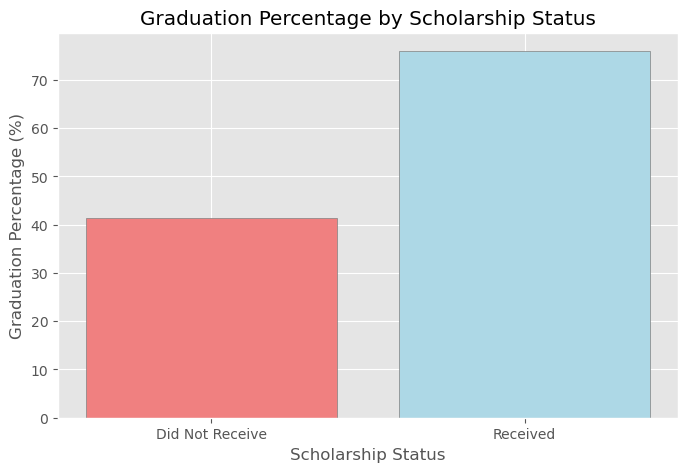

In [20]:
import matplotlib.pyplot as plt

# Calculate percentages
percentage_grads_with_scholarship = (grads_with_scholarship / total_scholarships) * 100
percentage_grads_with_no_scholarship = (grads_with_no_scholarship / total_with_no_scholarship) * 100

# Data for plotting
labels = ['Did Not Receive', 'Received']  # Reversed the order here
percentages = [percentage_grads_with_no_scholarship, percentage_grads_with_scholarship]  # Reversed the order here

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bars
ax.bar(labels, percentages, color=['lightcoral', 'lightblue'], edgecolor='grey')

# Set titles and labels
ax.set_title('Graduation Percentage by Scholarship Status')
ax.set_xlabel('Scholarship Status')
ax.set_ylabel('Graduation Percentage (%)')

# Display the plot
plt.show();

I will use a Z-Test because that will help me compare the means of these two groups.

* H0: There is no difference in the graduation rates between students with scholarships and students without scholarships.
* H1: There is a significant difference in graduation rates between students with scholarships and students without scholarships.

In [21]:
count = [grads_with_scholarship, grads_with_no_scholarship]  # Number of successes (graduates)
nobs = [total_scholarships, total_with_no_scholarship]  # Total number of observations (students)

In [22]:
# Perform Z-test for proportions
z_stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f'Z-statistic: {z_stat}')
print(f'p-value: {p_value}')

# Interpretation based on a significance level (e.g., alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print(f'Reject the null hypothesis in favor of the alternative.')
else:
    print(f'Fail to reject the null hypothesis.')


Z-statistic: 19.91964418915078
p-value: 2.7493749740442245e-88
Reject the null hypothesis in favor of the alternative.


## Switch to Numerical Data

In [23]:
num_cols = [
    'prev_grade',
    'admission_grade',
    'age_enrolled',
    'units_cred_1s',
    'units_enr_1s',
    'units_eval_1s',
    'units_app_1s',
    'units_grade_1s',
    'units_no_eval_1s',
    'units_cred_2s',
    'units_enr_2s',
    'units_eval_2s',
    'units_app_2s',
    'units_grade_2s',
    'units_no_eval_2s',
    'unemployment_rate',
    'inflation_rate',
    'gdp'
]

In [24]:
num_df = df[num_cols].copy()
num_df['target'] = df['target']
num_df.head()

,prev_grade,admission_grade,age_enrolled,units_cred_1s,units_enr_1s,units_eval_1s,units_app_1s,units_grade_1s,units_no_eval_1s,units_cred_2s,units_enr_2s,units_eval_2s,units_app_2s,units_grade_2s,units_no_eval_2s,unemployment_rate,inflation_rate,gdp,target
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [25]:
num_df.describe()

,prev_grade,admission_grade,age_enrolled,units_cred_1s,units_enr_1s,units_eval_1s,units_app_1s,units_grade_1s,units_no_eval_1s,units_cred_2s,units_enr_2s,units_eval_2s,units_app_2s,units_grade_2s,units_no_eval_2s,unemployment_rate,inflation_rate,gdp
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


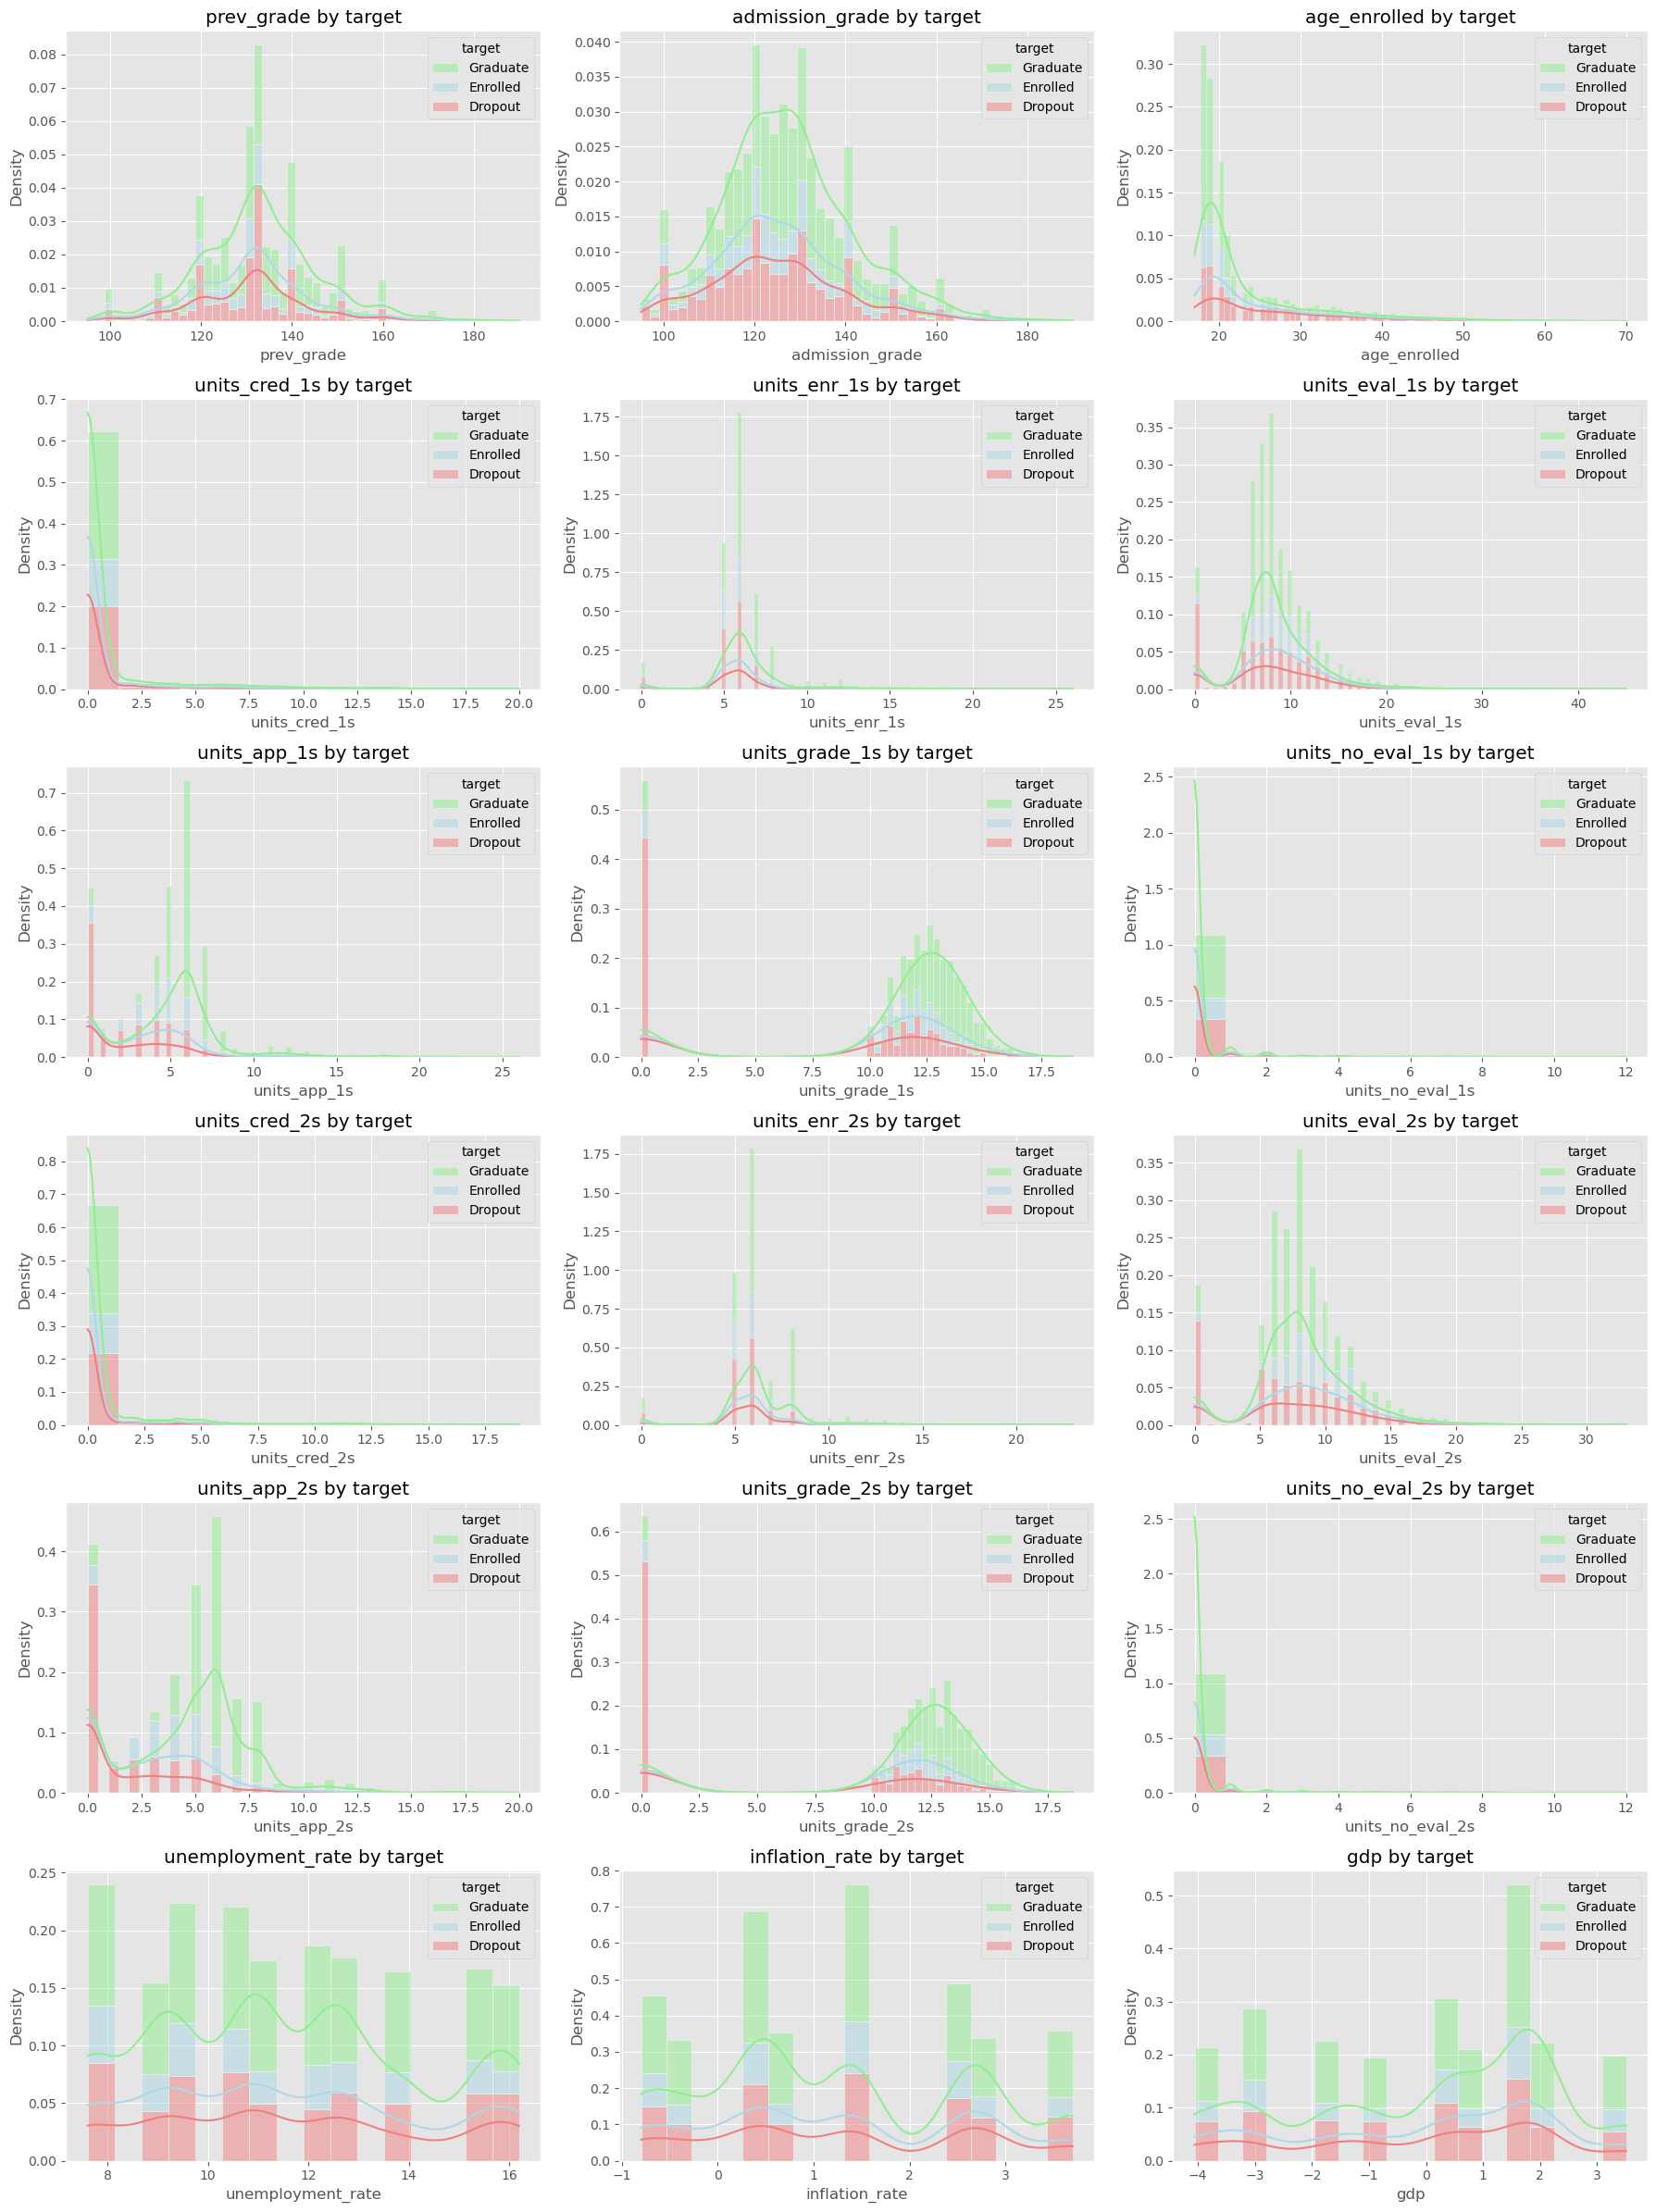

In [27]:
# Number of plots per row
plots_per_row = 3

# Set up the number of rows and columns based on the number of numerical columns
n_columns = len(num_df.columns) - 1  # Exclude 'target'
n_rows = (n_columns + plots_per_row - 1) // plots_per_row  # Round up for number of rows

# Set up the figure with a specified size
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(18, 4 * n_rows))

# Flatten axes array for easy iteration if we have multiple rows
axes = axes.flatten()

# Define a custom color palette for the target categories
custom_palette = {
    'Dropout': 'lightcoral',
    'Enrolled': 'lightblue',
    'Graduate': 'lightgreen'
}

# Set the order of the target categories for both stacking and legend
hue_order = ['Graduate', 'Enrolled', 'Dropout']  # Reverse the order to ensure Dropout is at the bottom

# Loop through each column (xcept 'target'
for idx, column in enumerate(num_df.columns):
    if column != 'target':
        sns.histplot(
            num_df, x=column, hue='target', kde=True, 
            multiple="stack", ax=axes[idx], palette=custom_palette, 
            stat="density", hue_order=hue_order
        )
        axes[idx].set_title(f'{column} by target')
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel('Density')

# Hide any unused subplots (if any)
for i in range(n_columns, len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout();


* Grade-type columns are on a 200 point scale with averages near 130
* Average age at enrollment is 23
* Average units enrolled is 6.3 first semester and 6.2 second semester
* Approved credits average 4.7 first semester and 4.4 second semester
    * Conversion of units ratio is 75% and 71% respectively, hinting at increased difficulty in courses in the second semester
* Most students are employed while in school
* Inflation ranges from roughly -1% to 4%
* GDP is a wide range from -4% to 3.5%

In [28]:
# Convert target to numeric format so we can run a correlation matrix
# to determine which features have the highest association with graduation
num_df['target'] = num_df['target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})

                   prev_grade  admission_grade  age_enrolled  units_cred_1s  \
prev_grade           1.000000         0.580444     -0.111377      -0.008872   
admission_grade      0.580444         1.000000     -0.029915       0.040829   
age_enrolled        -0.111377        -0.029915      1.000000       0.226837   
units_cred_1s       -0.008872         0.040829      0.226837       1.000000   
units_enr_1s        -0.029169        -0.033251      0.141327       0.774344   
units_eval_1s       -0.070702        -0.072059      0.139911       0.542919   
units_app_1s         0.048410         0.070892     -0.053405       0.628394   
units_grade_1s       0.059438         0.073868     -0.156616       0.122978   
units_no_eval_1s    -0.003926         0.009033      0.057470       0.116262   
units_cred_2s       -0.018489         0.040225      0.207561       0.944811   
units_enr_2s        -0.031649        -0.041878      0.085914       0.644826   
units_eval_2s       -0.061355        -0.057132      

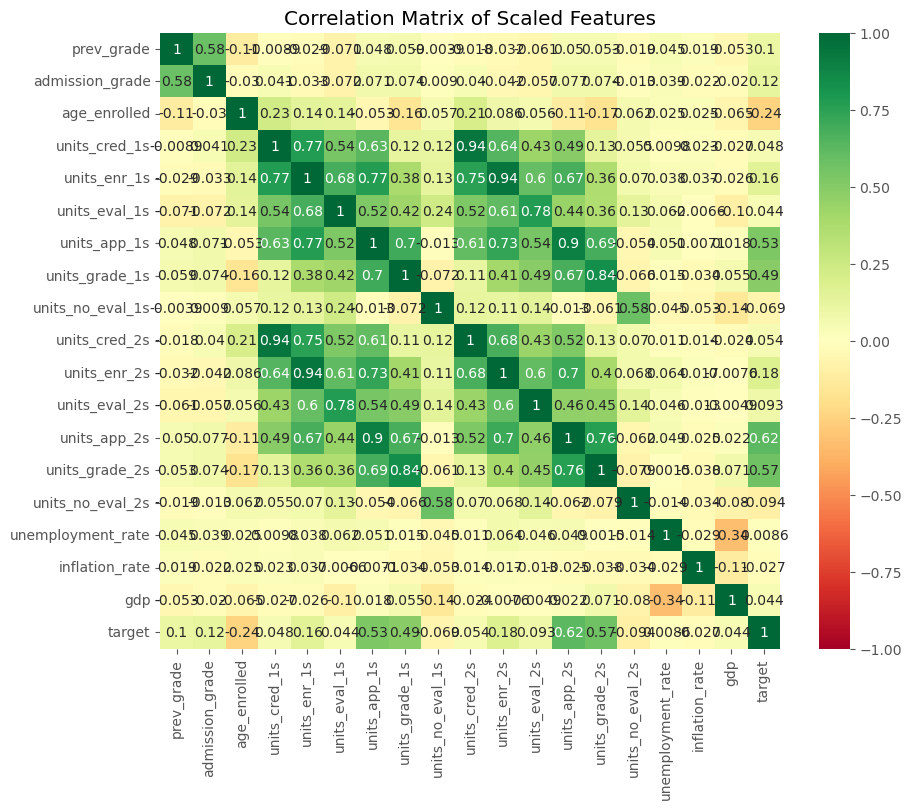

In [29]:
# Create matrix
correlation_matrix = num_df.corr()
print(correlation_matrix)

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Scaled Features")
plt.show()

In [30]:
# Print correlations to target in descending order
# We see that units applied and graded for both 1st and 2nd semester are moderately correlated with target
# All others show weak correlation
target_corr = correlation_matrix['target'].drop('target')  # Drop self-correlation
sorted_corr = target_corr.sort_values(ascending=False)
print(sorted_corr)

units_app_2s         0.624157
units_grade_2s       0.566827
units_app_1s         0.529123
units_grade_1s       0.485207
units_enr_2s         0.175847
units_enr_1s         0.155974
admission_grade      0.120889
prev_grade           0.103764
units_eval_2s        0.092721
units_cred_2s        0.054004
units_cred_1s        0.048150
units_eval_1s        0.044362
gdp                  0.044135
unemployment_rate    0.008627
inflation_rate      -0.026874
units_no_eval_1s    -0.068702
units_no_eval_2s    -0.094028
age_enrolled        -0.243438
Name: target, dtype: float64


In [47]:
# Isolate mean of units_app and units_grade for 1st and 2nd semester grouped by target
mean_units_app_1s = num_df.groupby('target')['units_app_1s'].mean()
mean_units_app_2s = num_df.groupby('target')['units_app_2s'].mean()
mean_units_grade_1s = num_df.groupby('target')['units_grade_1s'].mean()
mean_units_grade_2s = num_df.groupby('target')['units_grade_2s'].mean()


# Create a new data frame
sem_comp_df = pd.DataFrame({
    'mean_units_app_1s': mean_units_app_1s,
    'mean_units_app_2s': mean_units_app_2s,
    'mean_units_grade_1s': mean_units_grade_1s,
    'mean_units_grade_2s': mean_units_grade_2s
})

sem_comp_df.reset_index(inplace=True)
sem_comp_df

,target,mean_units_app_1s,mean_units_app_2s,mean_units_grade_1s,mean_units_grade_2s
0,0,2.551724,1.940183,7.256656,5.899339
1,1,4.318640,4.057935,11.125257,11.117364
2,2,6.232232,6.177003,12.643655,12.697276


In [52]:
print(f'Difference in first semster and second semester approved credits:\n{sem_comp_df["mean_units_app_2s"] - sem_comp_df["mean_units_app_1s"]}')
print(f'\n\nDifference in first semster and second semester graded credits:\n{sem_comp_df["mean_units_grade_2s"] - sem_comp_df["mean_units_grade_1s"]}')

Difference in first semster and second semester approved credits:
0   -0.611541
1   -0.260705
2   -0.055229
dtype: float64


Difference in first semster and second semester graded credits:
0   -1.357317
1   -0.007893
2    0.053621
dtype: float64


Comparing first semester to second semester performance we see:
- A decrease in approved credits for all students, with the largest decrease for students that end up dropping out and the smallest decrease for students that graduate
- A large (relatively) decrease in graded units for students that dropout, with those remaining enrolled and graduating remaining nearly unchanged.

I'll do a paired t-test on each target group to compare units_app and units_grade from 1st semester to 2nd semester (6 tests total) to see if these differences are significant.

* For units_app:
    * H0: There is no significant difference between the means of units_app_1s and units_app_2s for the target group tested (Dropout, Enrolled, or Graduate).
    * H1: There is a significant difference between the means of units_app_1s and units_app_2s for the target group tested (Dropout, Enrolled, or Graduate).

* For units_grade:
    * H0: There is no significant difference between the means of units_grade_1s and units_grade_2s for the target group tested (Dropout, Enrolled, or Graduate).
    * H1: There is a significant difference between the means of units_grade_1s and units_grade_2s for the target group tested (Dropout, Enrolled, or Graduate).

In [68]:
def paired_ttest(target_group, s1_data, s2_data, alpha=0.05):

    # Perform the paired t-test between the two columns
    t_stat, p_value = stats.ttest_rel(target_group[s1_data], target_group[s2_data])

    # Print the results
    print(f'T-statistic: {t_stat}')
    print(f'p-value: {p_value}')

    # Interpretation based on a significance level
    if p_value < alpha:
        print(f'Reject the null hypothesis in favor of the alternative.')
    else:
        print(f'Fail to reject the null hypothesis.')


Dropouts

In [92]:
# Units applied
paired_ttest(num_df[num_df['target'] == 0], 'units_app_1s', 'units_app_2s', 0.05)

T-statistic: 15.528321866011643
p-value: 2.4065551823002677e-50
Reject the null hypothesis in favor of the alternative.


In [87]:
# Dropouts by units graded
paired_ttest(num_df[num_df['target'] == 0], 'units_grade_1s', 'units_grade_2s', 0.05)


T-statistic: 11.595552204150227
p-value: 9.076563830333604e-30
Reject the null hypothesis in favor of the alternative.


Results for Dropouts:
* Units applied is statistically different between 1st and 2nd semester
* Units graded is statistically different between 1st and 2nd semester

Enrolled

In [89]:
# Units applied
paired_ttest(num_df[num_df['target'] == 1], 'units_app_1s', 'units_app_2s', 0.05)

T-statistic: 5.001121060636353
p-value: 7.020820670240135e-07
Reject the null hypothesis in favor of the alternative.


In [90]:
# Enrolled by units graded
paired_ttest(num_df[num_df['target'] == 1], 'units_grade_1s', 'units_grade_2s', 0.05)

T-statistic: 0.08748671935065828
p-value: 0.9303067280071079
Fail to reject the null hypothesis.


Results for Enrolled students:
* Units applied is statistically different between 1st and 2nd semester
* Units graded is NOT statistically different between 1st and 2nd semester

Graduates

In [73]:
# Units applied
paired_ttest(num_df[num_df['target'] == 2], 'units_app_1s', 'units_app_2s', 0.05)

T-statistic: 2.2882625735900572
p-value: 0.02221632900685792
Reject the null hypothesis in favor of the alternative.


In [77]:
# Units graded
paired_ttest(num_df[num_df['target'] == 2], 'units_grade_1s', 'units_grade_2s', 0.05)

T-statistic: -2.469434001402738
p-value: 0.01360783940595382
Reject the null hypothesis in favor of the alternative.


Results for Graduates:
* Units applied is statistically different between 1st and 2nd semester
* Units graded is statistically different between 1st and 2nd semester

Summary of Results
* All student groups (Dropout, Enrolled, Graduates) show a statistically significant decrease in approved credits from first semester to second semester. On average, dropouts have approved units of almost half a unit less than other student groups which may serve as a flag to Advisors of the students likelihood of dropping out. Student Services can work with individual students to learn more about circumstances leading to decreased unit approval and offer tailored solutions to work with them to maintain enrollment and work toward graduation.
* Testing shows that the decrease in graded units from Semester 1 to Semester 2 is significant for students that end up dropping out is significant. Enrolled students showed no statistical difference while Graduates showed a mild, but statistically significant, increase in graded units. Units graded is about 40-50% less for students that end up dropping out. This could be due to a number of factors such as financial constraints, difficulty handling the rigor of the college courses, or seriousness about degree program. Meetings with academic advisors may help tease out these challenges to open up more opportunities for student success.

In [31]:
# creating function to reset scores for model performance tests for different X_train variations
def reset_model_scores(models):
  for name in models:
    models[name]["All_Scores"] = list()
    models[name]["Top_Score"] = float()
    models[name]["Mean_Score"] = float()
    models[name]["Std_Score"] = float()

  return models

In [32]:
def test_models_performance(models, x_train, y_train, isRegressor, num_folds = 10):

  # reset the performance scores first using function above
  reset_model_scores(models)

  # set scoring type based on model type
  scoring = "neg_mean_squared_error" if isRegressor else "accuracy"

  # get the performance scores for each model and add them to the
  # corresponding result list
  for name in models:

    folds = KFold(n_splits=num_folds) if isRegressor else StratifiedKFold(n_splits=num_folds)

    results = cross_val_score(estimator=models[name]["Estimator"],
                              X=x_train,
                              y=y_train,
                              cv=folds,
                              scoring=scoring)
    models[name]["Top_Score"] = results.max()
    models[name]["Mean_Score"] = results.mean()
    models[name]["Std_Score"] = results.std()

    for result in results:
      models[name]["All_Scores"].append(result)

  # print the results
  for name in models:
    print("\n[MODEL TYPE: {}]\n".format(name))
    print(">>>> Top Performance: \t\t{:.4f}".format(models[name]["Top_Score"]))
    print(">>>> Average Performance: \t{:.4f}".format(models[name]["Mean_Score"]))
    print(">>>> Spread of Performance: \t{:.4f}".format(models[name]["Std_Score"]))

In [33]:
# printing accuracy scores
def print_accuracy(y_test, y_pred, isRegressor):

  if isRegressor:
    accuracy = 100 * explained_variance_score(y_test, y_pred)
  else:
    accuracy = 100 * accuracy_score(y_true=y_test,
                                y_pred=y_pred)

  print("> ACCURACY: \t{:.2f}%".format(accuracy))

In [35]:
# Identify the target feature and isolate it to produce X and y data segments
TARGET = 'target'
X, y = num_df.drop(columns=TARGET), num_df[TARGET]

In [101]:
# Split X and Y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)

In [102]:
# fit the X_train
# transform X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
# now we'll use the minmax scaler
mm_scaler = MinMaxScaler()
X_train_mm_scaled = mm_scaler.fit_transform(X_train)
X_test_mm_scaled = mm_scaler.transform(X_test)

In [104]:
# creating models that we want to test to see which is most optimized
# we will use this to test different X_train variations
models = {
    "LOGREG": {
        "Estimator": LogisticRegression(),
    },

    "DECISION TREE": {
        "Estimator": DecisionTreeClassifier(),
    },

    "KNN": {
        "Estimator": KNeighborsClassifier(),
    },
    "SVM": {
        "Estimator": SVC(),
    },
    "Bayes": {
        "Estimator": GaussianNB(),
    },
}

In [105]:
# Function to reset model scores
def reset_model_scores(models):
    for name in models:
        models[name]["All_Scores"] = list()
        models[name]["Top_Score"] = float()
        models[name]["Mean_Score"] = float()
        models[name]["Std_Score"] = float()

    return models

# Modified performance testing function for classification
def test_models_performance(models, x_train, y_train, isClassifier=True, num_folds=10):
    reset_model_scores(models)

    # Use appropriate scoring metric based on whether it's a classification or regression task
    scoring = "accuracy" if isClassifier else "neg_mean_squared_error"

    # Get the performance scores for each model and add them to the corresponding result list
    for name in models:
        folds = StratifiedKFold(n_splits=num_folds)  # StratifiedKFold for classification
        results = cross_val_score(estimator=models[name]["Estimator"],
                                  X=x_train,
                                  y=y_train,
                                  cv=folds,
                                  scoring=scoring)
        models[name]["Top_Score"] = results.max()
        models[name]["Mean_Score"] = results.mean()
        models[name]["Std_Score"] = results.std()

        for result in results:
            models[name]["All_Scores"].append(result)

    # Print the results
    for name in models:
        print("\n[MODEL TYPE: {}]\n".format(name))
        print(">>>> Top Performance: \t\t{:.4f}".format(models[name]["Top_Score"]))
        print(">>>> Average Performance: \t{:.4f}".format(models[name]["Mean_Score"]))
        print(">>>> Spread of Performance: \t{:.4f}".format(models[name]["Std_Score"]))


In [106]:
from sklearn.metrics import classification_report

# Modify the accuracy printing function for classification
def print_accuracy(y_test, y_pred, isClassifier=True):
    if isClassifier:
        # Print classification metrics like accuracy, precision, recall, F1-score
        print("> ACCURACY: \t{:.2f}%".format(100 * accuracy_score(y_test, y_pred)))
        print("> Classification Report: ")
        print(classification_report(y_test, y_pred))

    else:
        # Regression output
        accuracy = 100 * explained_variance_score(y_test, y_pred)
        print("> ACCURACY: \t{:.2f}%".format(accuracy))


In [107]:
# Test the models with classification task
test_models_performance(models, X_train, y_train, isClassifier=True)

# Print the classification accuracy for the best model (e.g., using Logistic Regression here)
best_model = models["LOGREG"]["Estimator"]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print_accuracy(y_test, y_pred, isClassifier=True)



[MODEL TYPE: LOGREG]

>>>> Top Performance: 		0.7564
>>>> Average Performance: 	0.7415
>>>> Spread of Performance: 	0.0126

[MODEL TYPE: DECISION TREE]

>>>> Top Performance: 		0.6836
>>>> Average Performance: 	0.6499
>>>> Spread of Performance: 	0.0264

[MODEL TYPE: KNN]

>>>> Top Performance: 		nan
>>>> Average Performance: 	nan
>>>> Spread of Performance: 	nan

[MODEL TYPE: SVM]

>>>> Top Performance: 		0.6836
>>>> Average Performance: 	0.6643
>>>> Spread of Performance: 	0.0131

[MODEL TYPE: Bayes]

>>>> Top Performance: 		0.7373
>>>> Average Performance: 	0.6852
>>>> Spread of Performance: 	0.0268
> ACCURACY: 	73.45%
> Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.80      0.73      0.76       316
    Enrolled       0.44      0.24      0.31       151
    Graduate       0.75      0.92      0.82       418

    accuracy                           0.73       885
   macro avg       0.66      0.63      0.63       885
weighted avg     

In [25]:
# Test the models with classification task
test_models_performance(models, X_train, y_train, isClassifier=True)

# Print the classification accuracy for the best model (e.g., using Logistic Regression here)
best_model = models["LOGREG"]["Estimator"]
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test)
print_accuracy(y_test, y_pred, isClassifier=True)



[MODEL TYPE: LOGREG]

>>>> Top Performance: 		0.7564
>>>> Average Performance: 	0.7415
>>>> Spread of Performance: 	0.0126

[MODEL TYPE: DECISION TREE]

>>>> Top Performance: 		0.6893
>>>> Average Performance: 	0.6510
>>>> Spread of Performance: 	0.0314

[MODEL TYPE: KNN]

>>>> Top Performance: 		nan
>>>> Average Performance: 	nan
>>>> Spread of Performance: 	nan

[MODEL TYPE: SVM]

>>>> Top Performance: 		0.6836
>>>> Average Performance: 	0.6643
>>>> Spread of Performance: 	0.0131

[MODEL TYPE: Bayes]

>>>> Top Performance: 		0.7373
>>>> Average Performance: 	0.6852
>>>> Spread of Performance: 	0.0268
> ACCURACY: 	65.08%
> Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.90      0.50      0.65       316
    Enrolled       0.00      0.00      0.00       151
    Graduate       0.59      1.00      0.74       418

    accuracy                           0.65       885
   macro avg       0.50      0.50      0.46       885
weighted avg     

In [26]:
# Test the models with classification task
test_models_performance(models, X_train, y_train, isClassifier=True)

# Print the classification accuracy for the best model (e.g., using Logistic Regression here)
best_model = models["LOGREG"]["Estimator"]
best_model.fit(X_train_mm_scaled, y_train)
y_pred = best_model.predict(X_test)
print_accuracy(y_test, y_pred, isClassifier=True)



[MODEL TYPE: LOGREG]

>>>> Top Performance: 		0.7564
>>>> Average Performance: 	0.7415
>>>> Spread of Performance: 	0.0126

[MODEL TYPE: DECISION TREE]

>>>> Top Performance: 		0.6808
>>>> Average Performance: 	0.6482
>>>> Spread of Performance: 	0.0255

[MODEL TYPE: KNN]

>>>> Top Performance: 		nan
>>>> Average Performance: 	nan
>>>> Spread of Performance: 	nan

[MODEL TYPE: SVM]

>>>> Top Performance: 		0.6836
>>>> Average Performance: 	0.6643
>>>> Spread of Performance: 	0.0131

[MODEL TYPE: Bayes]

>>>> Top Performance: 		0.7373
>>>> Average Performance: 	0.6852
>>>> Spread of Performance: 	0.0268
> ACCURACY: 	56.05%
> Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.92      0.25      0.40       316
    Enrolled       0.00      0.00      0.00       151
    Graduate       0.52      1.00      0.68       418

    accuracy                           0.56       885
   macro avg       0.48      0.42      0.36       885
weighted avg     

In [27]:
print(y_train.value_counts())

Target
Graduate    1791
Dropout     1105
Enrolled     643
Name: count, dtype: int64


Logistic Regression shows promise with an average accuracy of 74.15%. Will look into model improvement

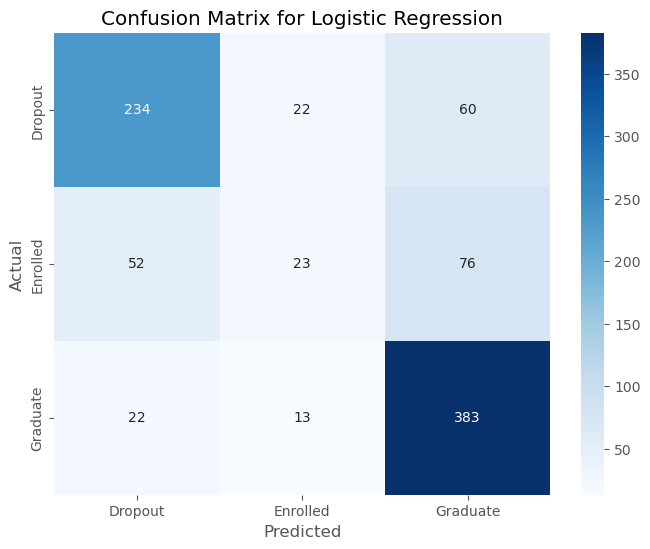

Confusion Matrix:
 [[234  22  60]
 [ 52  23  76]
 [ 22  13 383]]


In [28]:
# Fit the Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr')
model.fit(X_train_scaled, y_train)

# Predict the target values for X_test
y_pred = model.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optionally, print the confusion matrix as text
print("Confusion Matrix:\n", cm)